In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
sns.set_style(style="darkgrid")

In [2]:
diamond = pd.read_csv('../data/diamond.csv').drop('Unnamed: 0', axis=1)

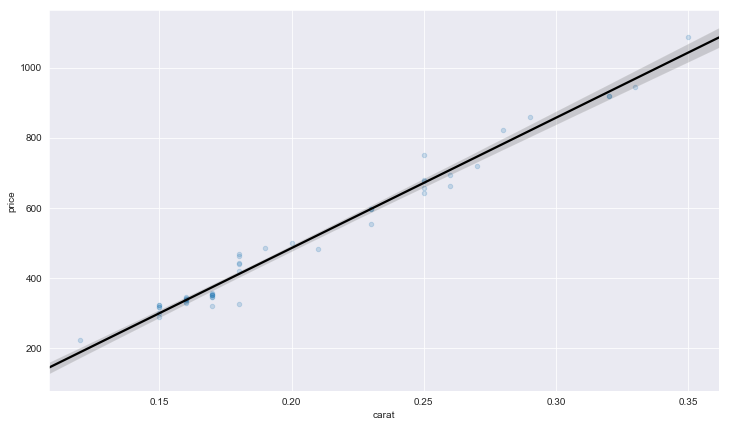

In [3]:
'''
    draw a regression plot and the scatter plot.
     - {scatter,line}_kws : Additional keyword arguments to pass to plt.scatter and plt.plot
'''
fig, ax = plt.subplots(figsize=(12, 7))
sns.regplot(
    x=diamond['carat'], 
    y=diamond['price'], 
    scatter_kws={'s': 20, 'alpha': 0.2}, 
    line_kws={'color': 'black'}
)

## Fit 1

In [4]:
model_1 = smf.ols('price ~ carat', data=diamond).fit()
model_1.params

Intercept    -259.625907
carat        3721.024852
dtype: float64

In [5]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2070.
Date:                Tue, 05 Mar 2019   Prob (F-statistic):           6.75e-40
Time:                        17:32:31   Log-Likelihood:                -233.20
No. Observations:                  48   AIC:                             470.4
Df Residuals:                      46   BIC:                             474.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -259.6259     17.319    -14.991      0.000    -294.487    -224.765
carat       3721.0249     81.786     45.497      0.000    3556.398    3885.651
==============================================================================
Omnibus:                        0.739   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.691   Jarque-Bera (JB):                0.181
Skew:                           0.056   Prob(JB):                        0.913
Kurtosis:                       3.280   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Fit 2

In [6]:
diamond['carat_center'] = diamond['carat'] - diamond['carat'].mean()

In [7]:
model_2 = smf.ols('price ~ carat_center', data=diamond).fit()
model_2.params

Intercept        500.083333
carat_center    3721.024852
dtype: float64

## Fit 3

In [8]:
model_3 = smf.ols('price ~ np.multiply(carat, 10)', data=diamond).fit()
model_3.params

Intercept                -259.625907
np.multiply(carat, 10)    372.102485
dtype: float64

## Prediction

In [9]:
newx = {
    'carat': [0.16, 0.27, 0.34]
}
newx = pd.DataFrame(newx)

In [10]:
model_1.predict(newx)

0     335.738069
1     745.050803
2    1005.522542
dtype: float64

In [11]:
model_1.predict()

array([ 372.94831757,  335.73806906,  372.94831757,  410.15856609,
        670.6303057 ,  335.73806906,  298.52782054,  447.3688146 ,
        521.78931163,  298.52782054,  410.15856609,  782.26105124,
        335.73806906,  484.57906312,  596.20980867,  819.47129976,
        186.89707499,  707.84055421,  670.6303057 ,  745.05080273,
        410.15856609,  335.73806906,  372.94831757,  335.73806906,
        372.94831757,  410.15856609,  372.94831757,  410.15856609,
        372.94831757,  298.52782054,  372.94831757,  931.1020453 ,
        931.1020453 ,  298.52782054,  335.73806906,  335.73806906,
        596.20980867,  596.20980867,  372.94831757,  968.31229382,
        670.6303057 , 1042.73279085,  410.15856609,  670.6303057 ,
        670.6303057 ,  298.52782054,  707.84055421,  298.52782054])

## Visual

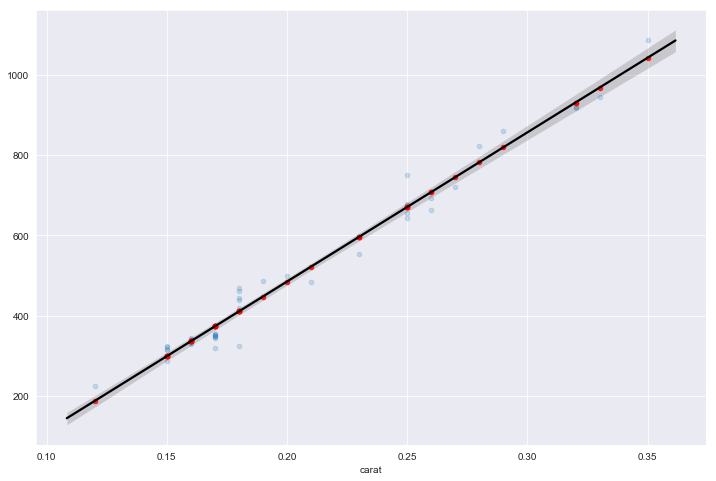

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.regplot(
    x=diamond['carat'], y=diamond['price'], 
    scatter_kws={'s': 20, 'alpha': 0.2}, 
    line_kws={'color': 'black'}
)

sns.regplot(
    x=diamond['carat'], y=model_1.fittedvalues, 
    scatter_kws={'s': 20, 'color': 'red'}, 
    fit_reg=False)